In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model= cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels=[] #empty list of python
file_name='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels =fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2=127.5
model.setInputMean((127.5,127.5,127.5))  #mobilenet=>[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000217BA7F9670>

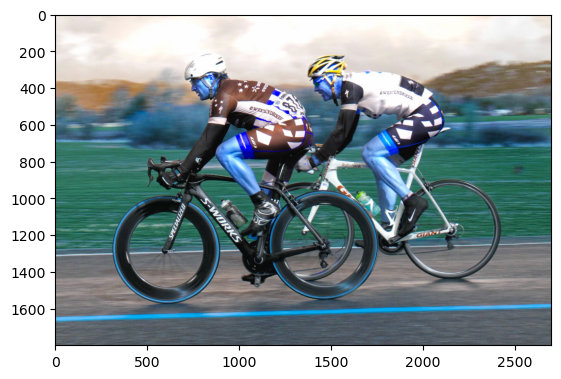

In [8]:
#to read any image
img= cv2.imread('Cyclists.jpg')
plt.imshow(img) #this image is showing in bgr

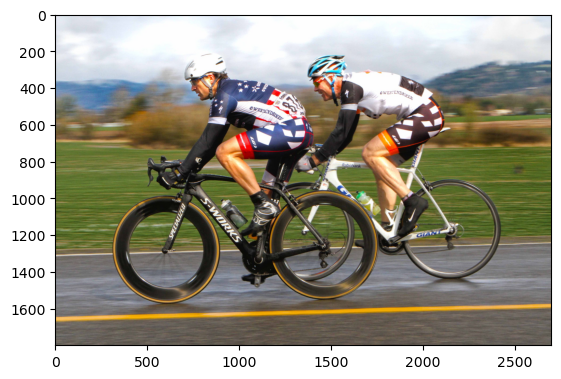

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #converting from bgr to rgb

In [20]:
ClassIndex, confidece, bbox= model.detect(img, confThreshold=0.6) #accuracy upto 60%
print(ClassIndex)

[2 1 2]


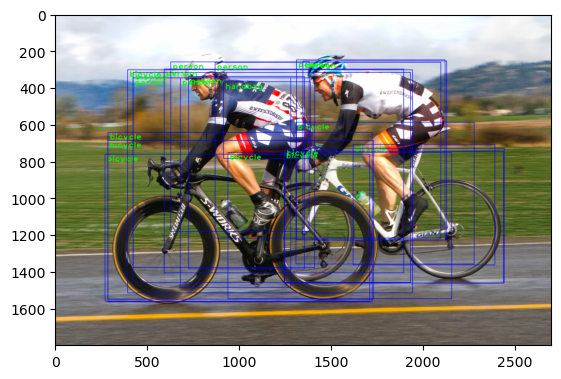

In [21]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex, confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [38]:
In [25]: cap= cv2.VideoCapture("VID_20220319_125505.mp4")

#Check if the video is opened correctly 
if not cap.isOpened():
    cap= cv2.VideoCapture(8)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidece, bbox=model.detect(frame, confThreshold=0.6)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+48), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow("Object Detection Tutorial", frame)

    if cv2.waitKey(2) & 0xFF== ord('a'):
                break

cap.release()
cv2.destroyAllwindows()

[ 1 15  1  1  1]
[ 1  1  1  1 15]
[1 1]
[1 1 1 1]
[1 1 1]
[ 1  1  1 15  1 15]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1 1]
[1]
[1]
[1 1 1 1]
[1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1 1 1 1]
[1 1 1 1]
[ 1  1  1  1  1 15]
[1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1]
[1]
[1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1]
[1 1 1 1]
[1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1]
[1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1 1]
[ 1  1  1 41  1  1]
[ 1  1 41  1  1]
[1 1 1]
[ 1

KeyboardInterrupt: 